In [3]:
import sys
import os
import glob
from glob import glob
import numpy as np
import datetime
import matplotlib.pyplot as plt
import json

In [23]:
def euclidean_distance(tensor1, tensor2):
    squared_distance = np.sum((tensor1 - tensor2) ** 2)
    return np.sqrt(squared_distance)


def find_k_nearest_neighbors(tensor, missing_idx, k, distance_metric):
    distances = []
    for i in range(len(tensor)):
        if i == missing_idx:
            continue
        distance = distance_metric(tensor[missing_idx], tensor[i])
        distances.append((i, distance))
    distances.sort(key=lambda x: x[1])
    return [idx for idx, _ in distances[:k]]

def knn_imputation(tensor, k, distance_metric):
    filled_tensor = np.copy(tensor)

    for i in range(tensor.shape[0]):
        for j in range(tensor.shape[1]):
            for z in range(tensor.shape[2]):
                if np.isnan(tensor[i, j, z]):
                    neighbors = find_k_nearest_neighbors(tensor, i, k, distance_metric)
                    neighbor_values = [tensor[n, j, z] for n in neighbors if not np.isnan(tensor[n, j, z])]
                    filled_tensor[i, j, z] = np.mean(neighbor_values)

    return filled_tensor

def check_data(files):
    all_f = glob(files)
    all_f.sort()
    if len(all_f) < 12:
        return
    res = np.zeros(shape=(len(all_f), 50, 50, 2))
    for it in range(len(all_f)):
        arr = np.load(all_f[it])
        qual = arr[2, ...]
        for i in range(qual.shape[0]):
            for j in range(qual.shape[1]):
                if (qual[i][j] == 2) or (qual[i][j] == 3):
                    res[it][i][j][0] = np.nan
                    res[it][i][j][1] = np.nan
                else:
                    res[it][i][j][0] = arr[0][i][j]
                    res[it][i][j][1] = arr[1][i][j]
    print("BEFORE IMPUTE SHAPE:", res.shape)
    return res

In [24]:
path = ('/home/fun/wildfire_data/*')
folders = glob(path)
for folder in folders:
    prof = folder + '/profile.json'
    f = open(prof)
    info = json.load(f)
    end = datetime.datetime.strptime(info['end'], '%Y-%m-%d')
    cutoff_date = end.replace(year=2021, month=2, day=1)
    if type(info['info']['acres_burned']) != str:
        if (info['info']['acres_burned'] >= 3000) and (end <= cutoff_date):
            files = folder + '/r_MOD13*.npy'
            print(folder)
            try:
                res = check_data(files)
                print(res.shape)
            except:
                continue
            k = 12  # Number of nearest neighbors to consider
            try:
                filled_res = knn_imputation(res[:, :,  :, 0], k, euclidean_distance)
                filled_res = filled_res[:, :, :, np.newaxis]
                filled_evi = knn_imputation(res[:, :,  :, 1], k, euclidean_distance)
                filled_evi = filled_evi[:, :, :, np.newaxis]
                filled_res = np.append(filled_res, filled_evi, axis=3)
                nan_mask = np.isnan(filled_res)
                num_nan_elements = np.sum(nan_mask)
                if (num_nan_elements>0):
                    print("NANS: ", num_nan_elements, folder)
#                     print("IMPUTED SHAPE:", filled_res.shape)
                path = folder + '/impute_ref.npy'
                np.save(path, filled_res)
            except:
                print("FAILED", folder)
                continue


/home/fun/wildfire_data/August_Complex_includes_Doe_Fire_2020-08-16
/home/fun/wildfire_data/July_Complex_2020-07-24
BEFORE IMPUTE SHAPE: (12, 50, 50, 2)
(12, 50, 50, 2)
/home/fun/wildfire_data/Kincade_Fire_2019-10-23
BEFORE IMPUTE SHAPE: (12, 50, 50, 2)
(12, 50, 50, 2)
/home/fun/wildfire_data/Delta_Fire_2018-09-05
BEFORE IMPUTE SHAPE: (12, 50, 50, 2)
(12, 50, 50, 2)
/home/fun/wildfire_data/Zogg_Fire_2020-09-27
BEFORE IMPUTE SHAPE: (12, 50, 50, 2)
(12, 50, 50, 2)
/home/fun/wildfire_data/Walker_Fire_2019-09-04
BEFORE IMPUTE SHAPE: (12, 50, 50, 2)
(12, 50, 50, 2)
/home/fun/wildfire_data/River_Fire_2020-08-16
BEFORE IMPUTE SHAPE: (12, 50, 50, 2)
(12, 50, 50, 2)
/home/fun/wildfire_data/Loyalton_Fire_2020-08-14
BEFORE IMPUTE SHAPE: (12, 50, 50, 2)
(12, 50, 50, 2)
/home/fun/wildfire_data/Klamathon_Fire_2018-07-05
BEFORE IMPUTE SHAPE: (12, 50, 50, 2)
(12, 50, 50, 2)
/home/fun/wildfire_data/Tubbs_Fire_Central_LNU_Complex_2017-10-08
BEFORE IMPUTE SHAPE: (12, 50, 50, 2)
(12, 50, 50, 2)
/home/fun/

/home/fun/wildfire_data/South_Fork_Fire_2017-08-14
/home/fun/wildfire_data/Cabin_Fire_2015-07-19
BEFORE IMPUTE SHAPE: (12, 50, 50, 2)
(12, 50, 50, 2)
/home/fun/wildfire_data/Boot_Fire_2018-09-04
BEFORE IMPUTE SHAPE: (12, 50, 50, 2)
(12, 50, 50, 2)
/home/fun/wildfire_data/Monticello_Fire_2014-07-04
BEFORE IMPUTE SHAPE: (12, 50, 50, 2)
(12, 50, 50, 2)
/home/fun/wildfire_data/Manzanita_Fire_2017-06-26
BEFORE IMPUTE SHAPE: (12, 50, 50, 2)
(12, 50, 50, 2)
/home/fun/wildfire_data/Coffee_Fire_2014-07-30
BEFORE IMPUTE SHAPE: (12, 50, 50, 2)
(12, 50, 50, 2)
/home/fun/wildfire_data/LaPorte_Fire_Wind_Complex_2017-10-09
BEFORE IMPUTE SHAPE: (18, 50, 50, 2)
(18, 50, 50, 2)
/home/fun/wildfire_data/Rye_Fire_2017-12-05
BEFORE IMPUTE SHAPE: (12, 50, 50, 2)
(12, 50, 50, 2)
/home/fun/wildfire_data/Mud_Fire_2017-08-29
BEFORE IMPUTE SHAPE: (12, 50, 50, 2)
(12, 50, 50, 2)
/home/fun/wildfire_data/Cold_Fire_2016-08-02
BEFORE IMPUTE SHAPE: (12, 50, 50, 2)
(12, 50, 50, 2)
/home/fun/wildfire_data/Willow_Fire_201

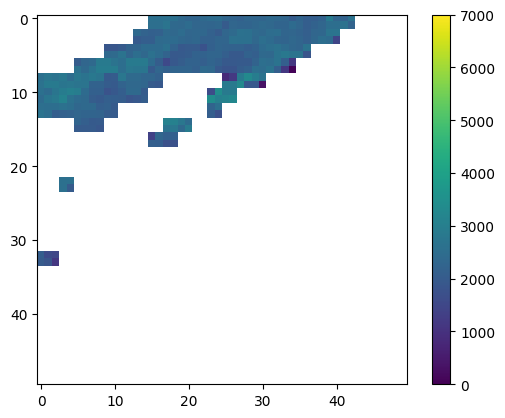

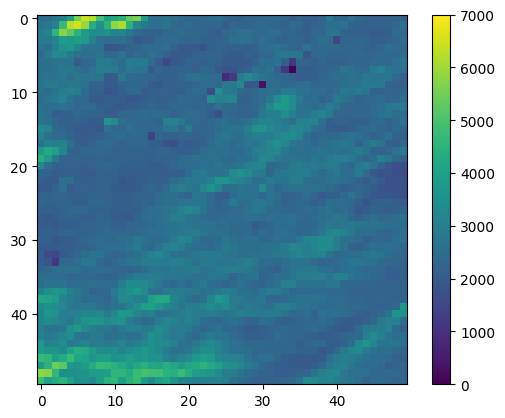

In [20]:
plt.imshow(res[5, :, :, 0],vmin=0, vmax =7000)
plt.colorbar()
plt.show()


plt.imshow(filled_res[5, :, :, 0],vmin=0, vmax =7000)
plt.colorbar()
plt.show()